## Group-5 Capstone Project Notebook

## Importing necessary Tools and Tool sets

In [8]:
import sqlite3 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from matplotlib.ticker import FuncFormatter
%matplotlib inline
def millions_formatter(x, pos):
    return f'{x / 100000000}'


## Establishing a connection to the SQL Database

In [9]:
conn = sqlite3.connect('data/zippedData/im.db')

## Connecting and opening the Movie Budget Data
-We chose this data because it provided insight into the Production budgets as well as the gross domestic revenue and the total worldwide revenue. 
-This dataset also have the name of the movies, this allows us to join this data set with the IMDB dataset

In [10]:
movie_budget = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')

## Pulling the Data we want to work with from SQL Database

In [ ]:
imbd = pd.read_sql("""
SELECT DISTINCT mb.primary_title, mb.genres,  p.primary_name as director
FROM movie_basics as mb,
directors as d on d.movie_id = mb.movie_id,
persons as p on d.person_id = p.person_id
; """, conn)
imbd

## Testing out Joins 
-This cell joins the movie_budget table with the SQL data pulled from above and create a new table "joins" 
-This new table shows the production budget, domestic gross, and world wide gross values of the movies from the movie_budget table along with the genres and directors of the movies
-This join is done by using an inner join connecting the tables using the title of the movies 

In [5]:
joins = movie_budget.set_index('movie').join(imbd.set_index('primary_title'), how='inner')
joins.reset_index(inplace=True)
joins.groupby('id').first()
joins

,index,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
0,#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,"Crime,Drama,Horror",Tara Subkoff
1,10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422","Drama,Horror,Mystery",Dan Trachtenberg
2,10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
3,12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648","Action,Drama,Romance",Gabriel Soriano
4,12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378","Action,Drama,History",Nicolai Fuglsig
...,...,...,...,...,...,...,...,...
4162,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Byron Howard
4163,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Rich Moore
4164,Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616","Adventure,Animation,Comedy",Jared Bush
4165,Zulu,82,"Dec 31, 2013","$16,000,000",$0,"$1,844,228","Crime,Drama,Thriller",Jérôme Salle


## Getting rid of Duplicate data
-Because some movies in our data set had multiple directors attributed to the movie we were getting duplicated movie indexes. 
-With the concentrated time we had for this data we decided to take only the first listed director for the movies. This allows us to work with the data in the production budget, domestic gross and worldwide gross values. 

In [6]:
joins = joins.groupby('index').nth(0)

## Chooses only the first genre
-Because multiple movies have multiple genres it was difficult to make distinctions of the data based on genre. With the concentrated time we had to work on this project we decided to take only the first genre listed in the genre column, this may affect the data

In [7]:
joins['genres'] = joins['genres'].str.split(",")
joins['genres'] = joins['genres'].fillna('Unknown')
for x in range(joins['genres'].count()):
    if joins['genres'][x] == 'Unknown':
        joins['genres'][x] = 'Unknown'
    else:
        joins['genres'][x] = joins['genres'][x][0]
        x +=1
joins

<ipython-input-7-608fd6d50ce4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = joins['genres'][x][0]
<ipython-input-7-608fd6d50ce4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  joins['genres'][x] = 'Unknown'


,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director
index,,,,,,,
#Horror,16,"Nov 20, 2015","$1,500,000",$0,$0,Crime,Tara Subkoff
10 Cloverfield Lane,54,"Mar 11, 2016","$5,000,000","$72,082,999","$108,286,422",Drama,Dan Trachtenberg
10 Days in a Madhouse,48,"Nov 11, 2015","$12,000,000","$14,616","$14,616",Drama,Timothy Hines
12 Rounds,37,"Mar 27, 2009","$20,000,000","$12,234,694","$17,306,648",Action,Gabriel Soriano
12 Strong,64,"Jan 19, 2018","$35,000,000","$45,819,713","$71,118,378",Action,Nicolai Fuglsig
...,...,...,...,...,...,...,...
Zoolander 2,64,"Feb 12, 2016","$50,000,000","$28,848,693","$55,348,693",Comedy,Ben Stiller
Zoom,26,"Aug 11, 2006","$35,000,000","$11,989,328","$12,506,188",Animation,Pedro Morelli
Zootopia,57,"Mar 4, 2016","$150,000,000","$341,268,248","$1,019,429,616",Adventure,Byron Howard


## Cleaning the data
-Turning the money string values into integers 

In [8]:
joins['domestic_gross']= joins['domestic_gross'].str.replace(',','')
joins['domestic_gross']= joins['domestic_gross'].str.replace('$','')
joins['domestic_gross'] = pd.to_numeric(joins['domestic_gross'])
joins['worldwide_gross']= joins['worldwide_gross'].str.replace(',','')
joins['worldwide_gross']= joins['worldwide_gross'].str.replace('$','')
joins['worldwide_gross'] = pd.to_numeric(joins['worldwide_gross'])
joins['production_budget']= joins['production_budget'].str.replace(',','')
joins['production_budget']= joins['production_budget'].str.replace('$','')
joins['production_budget'] = pd.to_numeric(joins['production_budget'])

## Creating a Profit column 

In [9]:
joins['profit'] = joins['worldwide_gross'] - joins['production_budget']
joins = joins.sort_values('profit', ascending=False)
joins.at['Avatar','director'] = 'James Cameron'
joins.at['Titanic','director'] = 'James Cameron'

joins

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit
index,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,James Cameron,2351345279
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,James Cameron,2008208395
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794
...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000


## Data Analysis for Directors 

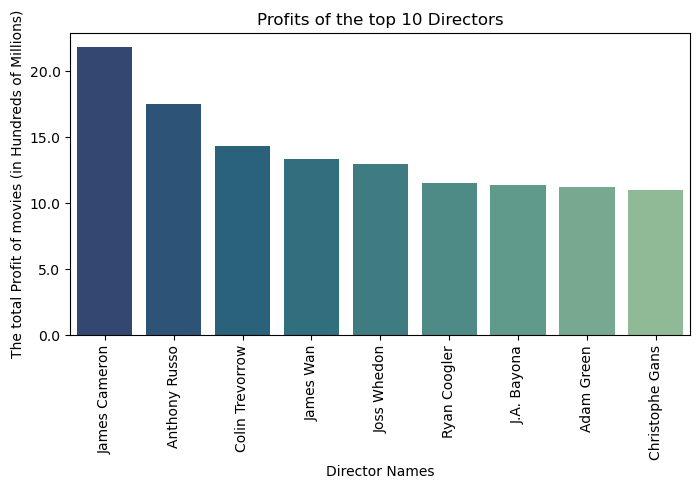

In [31]:
from matplotlib.pyplot import figure
#We want to search through only the top 10% of the data
percentage = int(round((len(joins['director'])/10),0))

x_axis = joins['director'].head(10)
y_axis = joins['profit'].head(10) 

figure(figsize=(8, 4), dpi=100)

ax = sns.barplot(x=x_axis, y=y_axis, ci=None, color='blue', palette='crest_r')


plt.xticks(rotation=90)
plt.title('Profits of the top 10 Directors')
plt.xlabel('Director Names')
plt.ylabel('The total Profit of movies (in Hundreds of Millions)')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))


## Creating a copy of the joined dataset 


In [11]:
copy = joins 
movies = []
n = len(copy)

for x in range(n):
    movies.append(copy.index[x])
movies
#Adding in a movies column so that we are able to search for the movie name within the dataset
copy['movies'] = movies

copy

,id,release_date,production_budget,domestic_gross,worldwide_gross,genres,director,profit,movies
index,,,,,,,,,
Avatar,1,"Dec 18, 2009",425000000,760507625,2776345279,Horror,James Cameron,2351345279,Avatar
Titanic,43,"Dec 19, 1997",200000000,659363944,2208208395,Adventure,James Cameron,2008208395,Titanic
Avengers: Infinity War,7,"Apr 27, 2018",300000000,678815482,2048134200,Action,Anthony Russo,1748134200,Avengers: Infinity War
Jurassic World,34,"Jun 12, 2015",215000000,652270625,1648854864,Action,Colin Trevorrow,1433854864,Jurassic World
Furious 7,67,"Apr 3, 2015",190000000,353007020,1518722794,Action,James Wan,1328722794,Furious 7
...,...,...,...,...,...,...,...,...,...
Call of the Wild,36,"Feb 21, 2020",82000000,0,0,Adventure,Chris Sanders,-82000000,Call of the Wild
Bright,80,"Dec 13, 2017",90000000,0,0,Action,David Ayer,-90000000,Bright
Men in Black: International,42,"Jun 14, 2019",110000000,3100000,3100000,Action,F. Gary Gray,-106900000,Men in Black: International


## Choosing the top 10% of the directors 

In [12]:
top50_dir = copy['director'].value_counts().head(percentage)
top50_dir = top50_dir.index

## Finding all of the movies that were directed by the top 10% of directors and then finding their profit 

In [13]:
top50_dir_movies = copy.loc[copy['director'].isin(top50_dir), 'profit']
top50_dir_profit = top50_dir_movies.values
type(top50_dir_profit)

numpy.ndarray

## Creating a Normally Distributed graph of the Profits of the top 10% of directors

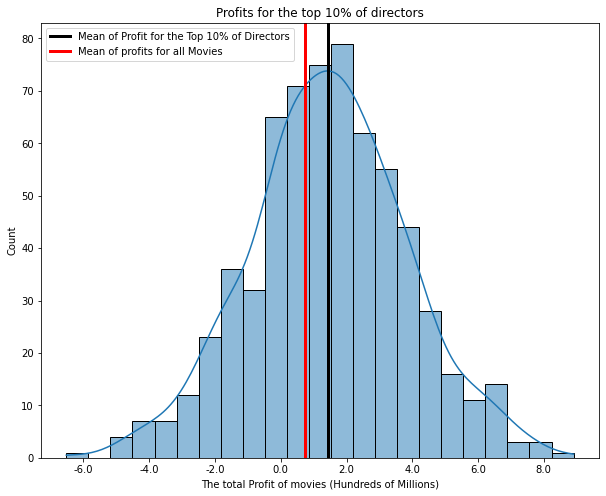

In [36]:
top50_dir_profit_mean = top50_dir_profit.mean() 
top50_dir_profit_std = top50_dir_profit.std()
top50_dir_profit_n = len(top50_dir_profit)
top50_dir_profit_median = np.median(top50_dir_profit)

fig, ax = plt.subplots(figsize=(10, 8))

s1  = np.random.normal(top50_dir_profit_mean,top50_dir_profit_std, top50_dir_profit_n)

sns.histplot(s1, kde=True, palette='crest_r')


ax.set_title('Profits for the top 10% of directors')
ax.set_xlabel('The total Profit of movies (Hundreds of Millions)')
ax.axvline(top50_dir_profit_mean, color='k', linewidth=3, label='Mean of Profit for the Top 10% of Directors')
ax.axvline(joins['profit'].mean(), color='r', linewidth=3, label='Mean of profits for all Movies')
ax.xaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax.legend()

## The central Tendenancys of the Profits of the top 10% of Directors

In [16]:
print(f"The average profits for movies directed by the top 10% of Directors is: {round(top50_dir_profit_mean,2)} dollars")
print(f"The median profits for movies directed by the top 10% of Directors is: {top50_dir_profit_median} dollars")
print(f"The standard deviation of the Profits for movies directed by the top 10% of Directors is: {round(top50_dir_profit_std,2)} dollars")
print(f"The mean of the Profits for all of the movies : {round(joins['profit'].mean(),2)}")
print(f"The movies directed by the top 10% of directors out performed the profits of all the movied by {round((top50_dir_profit_mean - joins['profit'].mean()),2)} dollars")

The average profits for movies directed by the top 10% of Directors is: 143064852.8 dollars
The median profits for movies directed by the top 10% of Directors is: 51076141.0 dollars
The standard deviation of the Profits for movies directed by the top 10% of Directors is: 238758210.69 dollars
The mean of the Profits for all of the movies : 72947804.24
The movies directed by the top 10% of directors out performed the profits of all the movied by 70117048.56 dollars
